# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [83]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn. linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [2]:
df = pd.read_csv('data/advertising.csv')

# 1. Exploratory Data Analysis

In [3]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [4]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


No tenemos valores nulos.

Sería interesante realizar el análisis con las variables numéricas y Topic Line y Country, pero vamos a tratar de hacerlo solo con las variables numéricas.

In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


<Axes: >

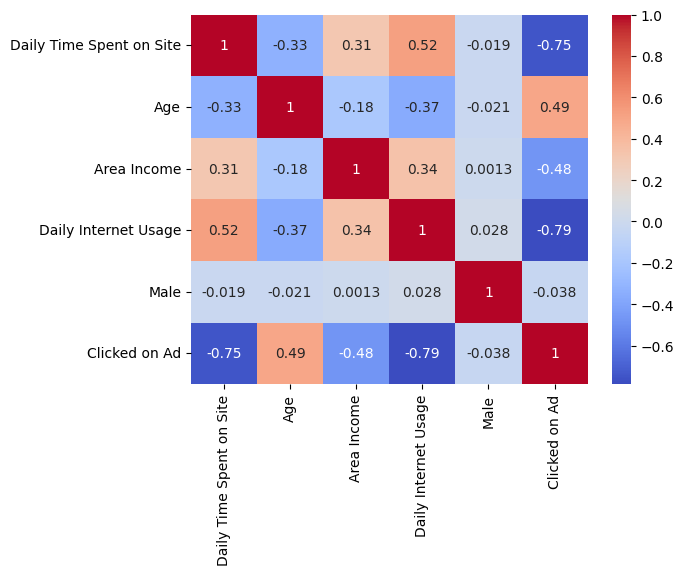

In [10]:
sns.heatmap(df.corr(numeric_only= True), annot = True, cmap = 'coolwarm')


#### 2. Train test split


In [12]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [24]:
X = np.array(df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']])
Y = np.array(df['Clicked on Ad'])

In [25]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2, random_state=44)

In [26]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1000, 5)
(1000,)
(800, 5)
(200, 5)
(800,)
(200,)



#### 3. StandardScaler()


In [27]:
st_scaler = StandardScaler()
st_scaler.fit(X_train)
x_train_st_scall = st_scaler.transform(X_train)
x_test_st_scall = st_scaler.transform(X_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [29]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_st_scall, Y_train)

LogisticRegression(max_iter=1000)

In [32]:
predictions = model.predict(x_test_st_scall)
print(predictions)

[1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0]


#### Cross validation

In [33]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, x_train_st_scall, Y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.9625 0.9625 0.975  0.95   0.975  0.95   0.9875 1.     0.95   0.9625]
Logistic Regression: 0.967500 (0.016008)


# 4. Evaluation


#### 0. Accuracy

In [34]:
predictions = model.predict(x_test_st_scall)
print(accuracy_score(Y_test, predictions))

0.97


In [35]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 97.0 %
Error: 3.0 %



#### 1. Confusion Matrix


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
c_matrix = confusion_matrix(Y_test, predictions)

In [38]:
print(c_matrix)

[[105   2]
 [  4  89]]


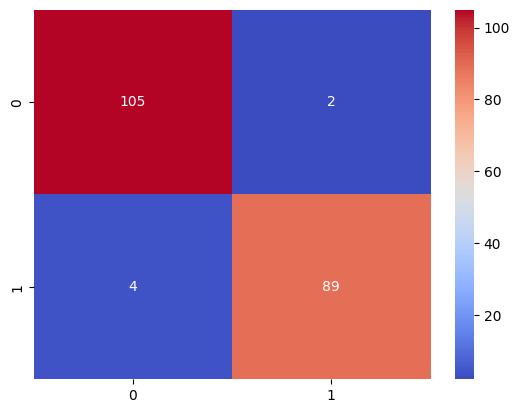

In [42]:
sns.heatmap(c_matrix, annot=True, cmap= 'coolwarm', fmt="g");

In [44]:
TN = 105
FP = 2
FN = 4
TP = 89

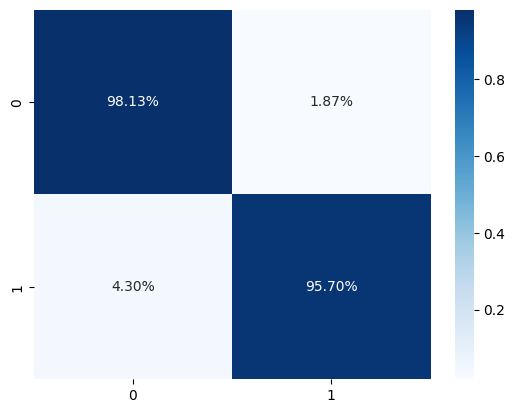

In [40]:
sns.heatmap(confusion_matrix(Y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');


#### 2. Precision


Cuántos son realmente 1s, de todos los que ha predicho como 1s

TP / (TP + FP)

In [66]:
precision = round((TP / (TP + FP) * 100), 2)

In [67]:
print(precision)

97.8




#### 3. Recall


Cuántos has predicho como 1, de los que realmente eran 1s

TP / (TP + FN)

In [68]:
recall = round((TP / (TP + FN) * 100), 2)

In [69]:
print(recall)

95.7




#### 4. F1 Score


2 * p * r / (r + p)

In [73]:
f1score = round(2*precision*recall / (precision + recall), 2)

In [74]:
print(f1score)

96.74




#### 5. ROC curve

In [80]:
from sklearn.metrics import RocCurveDisplay

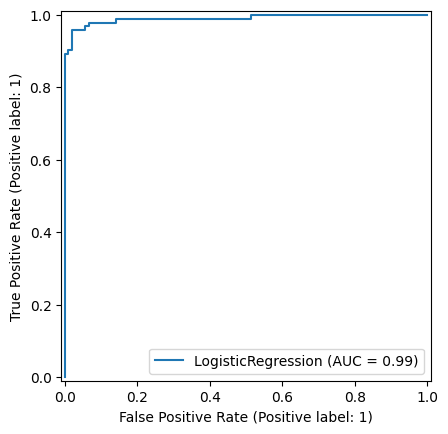

In [81]:
RocCurveDisplay.from_estimator(model, x_test_st_scall, Y_test)



#### 6. P-R curve

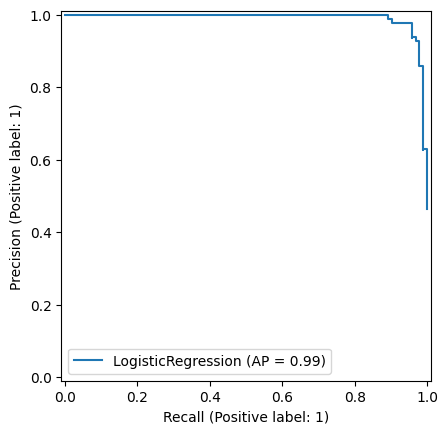

In [84]:
metrics.PrecisionRecallDisplay.from_estimator(model, x_test_st_scall, Y_test)